In [1]:
import sys
import glob
import numpy as np
import xarray as xr
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
## import local routines
sys.path.append('./utils')
from offline_lidar import virtualScanningLidar, virtualProfilingLidar, run_lidar_scan
from lidar_plot_routines import plot_3Dscan

In [3]:
WRF_DIR = "/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/"
WRF_FILE_PATTERN = "auxhist21_*"

Created Scanning Lidar virtual lidar
PPI scan at 0.00-90.00 az 45.00 elev 10 intervals
<xarray.Dataset>
Dimensions:  (AlongBeam: 4, BeamIndex: 20)
Dimensions without coordinates: AlongBeam, BeamIndex
Data variables:
    z        (BeamIndex, AlongBeam) float64 3.536 7.071 10.61 ... 10.61 14.14
    y        (BeamIndex, AlongBeam) float64 3.536 7.071 10.61 ... 10.61 14.14
    x        (BeamIndex, AlongBeam) float64 2.165e-16 4.33e-16 ... 8.66e-16
    az       (BeamIndex) float64 90.0 80.53 71.05 61.58 ... 71.05 80.53 90.0
    elev     (BeamIndex) float64 45.0 45.0 45.0 45.0 ... 45.0 45.0 45.0 45.0
    radius   (BeamIndex, AlongBeam) float64 5.0 10.0 15.0 ... 10.0 15.0 20.0


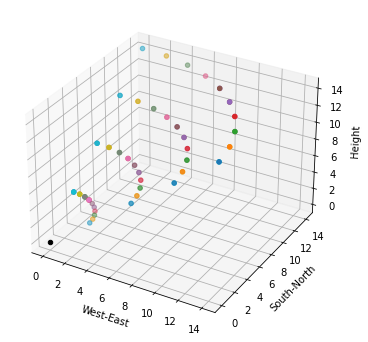

In [9]:
## Set up a default ZephIR300 virtual profiling lidar
lidar = virtualScanningLidar('Scanning Lidar')

# Set up the range gates and RWF function
# Parameters: min range gate [m], number of gates, gate resolution [m], RWF type (pulsed or CW) and RWF parameters

# lidar.set_range_gates(5,10,5,'cw',alpha0=0.028,lambdaw=1565e-9) # continuous wave lidar, ZephIR params
lidar.set_range_gates(5,4,5,'pulsed',tau=265,taum=165)  # pulsed lidar, Windcube params

# Set up the scan geometry (angles in degrees)
# Parameters: scan name (RHI,VAD,PPI) and angles
lidar.set_common_scan('RHI',az=0,elev1=0,elev2=45,nintervals=9) # RHI at azimuthal angle between elev1 and elev2
# lidar.set_common_scan('VAD',az0=0,elev=30,nintervals=28) # VAD starting at az0, fixed elevation angle
# lidar.set_common_scan('PPI',az1=0,az2=90,elev=45,nintervals=10) # PPI at azimuthal angle between elev1 and elev2

print(lidar.scandescription)
print(lidar.scanpoints)

plot_3Dscan(lidar.get_scan_points())

In [5]:
## select wrf output files
sorted_files = sorted(glob.iglob(WRF_DIR + WRF_FILE_PATTERN))[:5]
print(*sorted_files,sep = "\n")

/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:00
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:01
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:02
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:03
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:04


In [7]:
## set lidar position (x,y middle here)
lidar_pos = [250,250]

## loop through files and perform virtual scan (this can be slow)
ds = run_lidar_scan(lidar,lidar_pos,sorted_files,save_dir='/Users/raro0632/Desktop/test_lidar/')

## Assumes height levels constant throughout scan
## Currently doesn't do any accumulation time for a beam, just moves the beam for each output file and retrieves

At 250.000000, 250.000000 WRF Terrain height: 0.00m

Processing Time:  0
Processing Time:  1
Processing Time:  2
Processing Time:  3
Processing Time:  4


In [8]:
ds

<xarray.Dataset>
Dimensions:    (AlongBeam: 4, Time: 5)
Coordinates:
  * Time       (Time) int64 0 1 2 3 4
Dimensions without coordinates: AlongBeam
Data variables:
    LoS        (Time, AlongBeam) float64 0.6557 0.6835 0.708 ... 0.8015 0.8174
    BeamIndex  (Time) int64 0 1 2 3 4